---
#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import re

---
#File Load

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/Dataset/Tesla - Deaths.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(file_path)

---
# Data Wrangling

In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
       'Unnamed: 16', 'Unnamed: 17', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')


In [ ]:
# Very few values are not null.  Can drop
df['Note'].notnull().sum()

9

In [ ]:
#Records found without case# - can delete those rows
df['Case #'].isnull().sum()

13

In [ ]:
# Ratio of notes to row counts shows mostly null values - can drop
ratio_note_nulls = df['Note'].isnull().sum() / len(df)
print(ratio_note_nulls)

0.9706840390879479


In [ ]:
# There are 0 rows that are NOT null - can drop
df['Deceased 4'].notnull().sum()

0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Date_Month'] = df['Date'].dt.month
df['Date_Day'] = df['Date'].dt.day
df['Date_Year'] = df['Date'].dt.year

In [ ]:
mismatches = df[df['Date_Year'] != df['Year']]
print(f'Number of year mismatches = {len(mismatches)}')
print(mismatches[['Case #', 'Year', 'Date']])

Number of year mismatches = 18
     Case #    Year       Date
0     294.0  2022.0 2023-01-17
1     293.0  2022.0 2023-01-07
2     292.0  2022.0 2023-01-07
26    268.0  2020.0 2022-09-16
162   132.0   202.0 2020-09-17
294     NaN     NaN        NaT
295     NaN     NaN        NaT
296     NaN     NaN        NaT
297     NaN     NaN        NaT
298     NaN     NaN        NaT
299     NaN     NaN        NaT
300     NaN     NaN        NaT
301     NaN     NaN        NaT
302     NaN     NaN        NaT
303     NaN     NaN        NaT
304     NaN     NaN        NaT
305     NaN     NaN        NaT
306     NaN     NaN        NaT


In [ ]:
# Filter the DataFrame to keep only matching rows drop 'Year', 'Date' after - redundant
df = df[df['Date_Year'] == df['Year']]

# Reset the index after removing rows
df = df.reset_index(drop=True)

In [ ]:
# Replace '-' with 0
df.replace(regex=r'.*-.*', value=0, inplace=True)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
# Replace potential non-NaN null values with np.nan
df['Case #'].replace({'': np.nan, 'N/A': np.nan}, inplace=True)

# Drop rows with NaN values in 'Case #' column
df.dropna(subset=['Case #'], inplace=True)

# Check the count of null values after dropping
df['Case #'].isnull().sum()

0

In [ ]:
# None of the colums listed below bear marked relevance to the EDA - will drop
df = df.drop(['Year', 'Unnamed: 16', 'Unnamed: 17', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4', 'Description'], axis=1)

---
#Covert Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 17 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              289 non-null    float64       
 1   Date                                                                289 non-null    datetime64[ns]
 2   Country                                                             289 non-null    object        
 3   State                                                               289 non-null    object        
 4   Deaths                                                              289 non-null    float64       
 5   Tesla driver                                                        289 non-null    object        
 6   Tesla occupant                                            

In [ ]:
category_cols = ['Country', 'State', 'Model']
numeric_cols = ['Case #','Deaths', 'Tesla driver', 'Tesla occupant', 'Other vehicle',
                'Cyclists/ Peds', 'TSLA+cycl / peds', 'Verified Tesla Autopilot Deaths',
                'Autopilot claimed', 'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO',
                'Date_Month', 'Date_Day', 'Date_Year']

In [ ]:
for col in category_cols:
    df[col] = df[col].astype('category')

In [ ]:
for col in numeric_cols:
    df[col] = df[col].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 17 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Case #                                                              289 non-null    int32         
 1   Date                                                                289 non-null    datetime64[ns]
 2   Country                                                             289 non-null    category      
 3   State                                                               289 non-null    category      
 4   Deaths                                                              289 non-null    int32         
 5   Tesla driver                                                        289 non-null    int32         
 6   Tesla occupant                                            

#Univariate Analysis

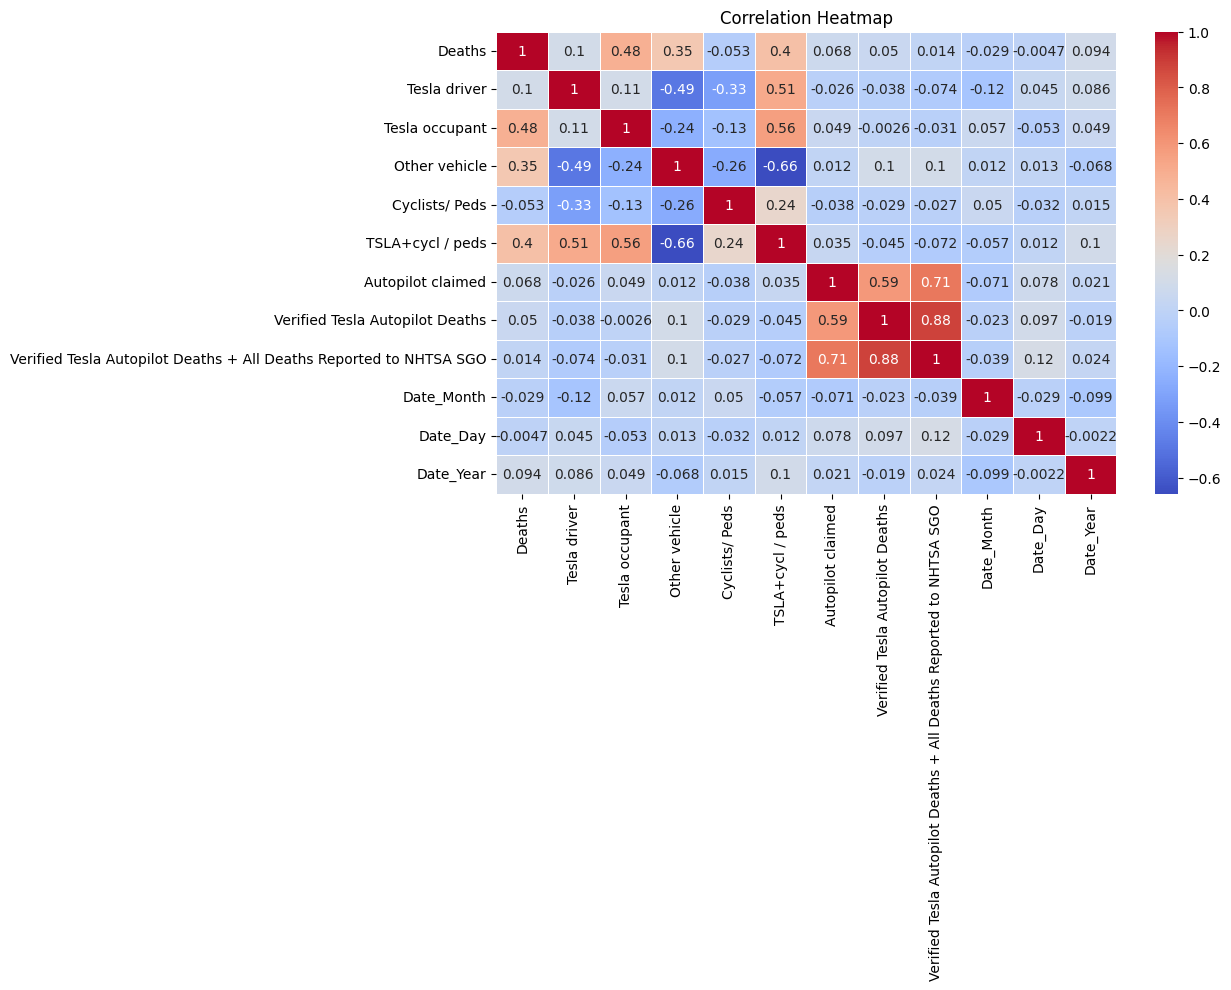

In [ ]:

correlation_matrix = df.drop('Case #', axis=1).corr(numeric_only=True)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

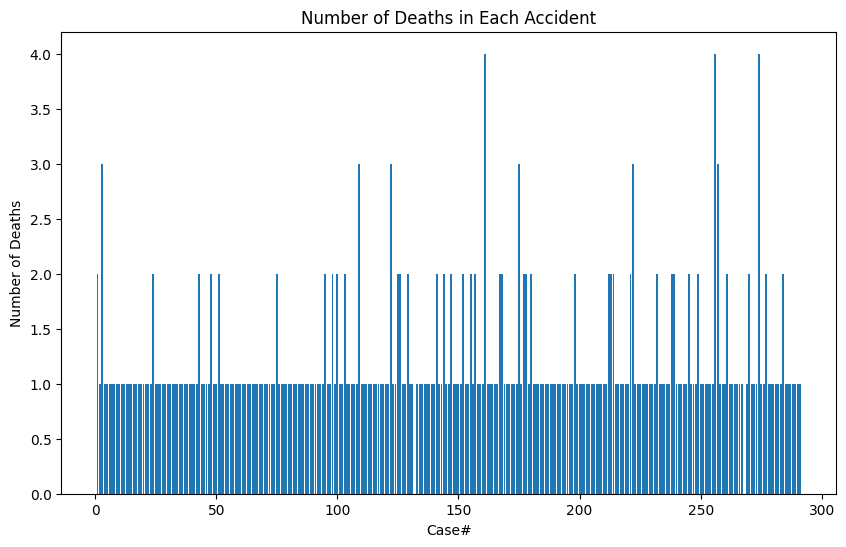

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Case #'], df['Deaths'])
plt.xlabel('Case#')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths in Each Accident')
plt.show()

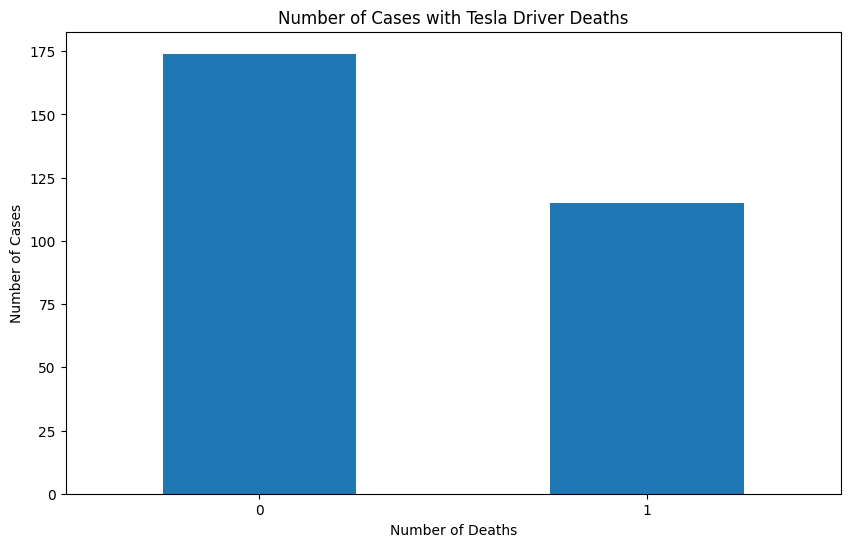

In [ ]:
# Count the occurrences of each death count
death_counts = df['Tesla driver'].value_counts()

plt.figure(figsize=(10, 6))
death_counts.plot(kind='bar')
plt.xlabel('Number of Deaths')
plt.ylabel('Number of Cases')
plt.title('Number of Cases with Tesla Driver Deaths')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

The proportion of events with one or more occupant deaths is: 1.00


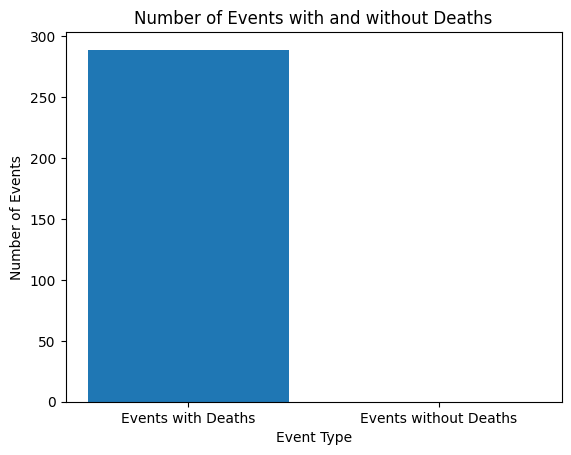

In [ ]:
# Calculate the number of events with at least one death
events_with_deaths = df[df['Deaths'] > 0]['Deaths'].count()

# Calculate the total number of events
total_events = df['Case #'].count()

# Calculate the proportion
proportion = events_with_deaths / total_events

print(f"The proportion of events with one or more occupant deaths is: {proportion:.2f}")
# Data
labels = ['Events with Deaths', 'Events without Deaths']
sizes = [events_with_deaths, total_events - events_with_deaths]

# Bar chart
plt.bar(labels, sizes)
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.title('Number of Events with and without Deaths')
plt.show()

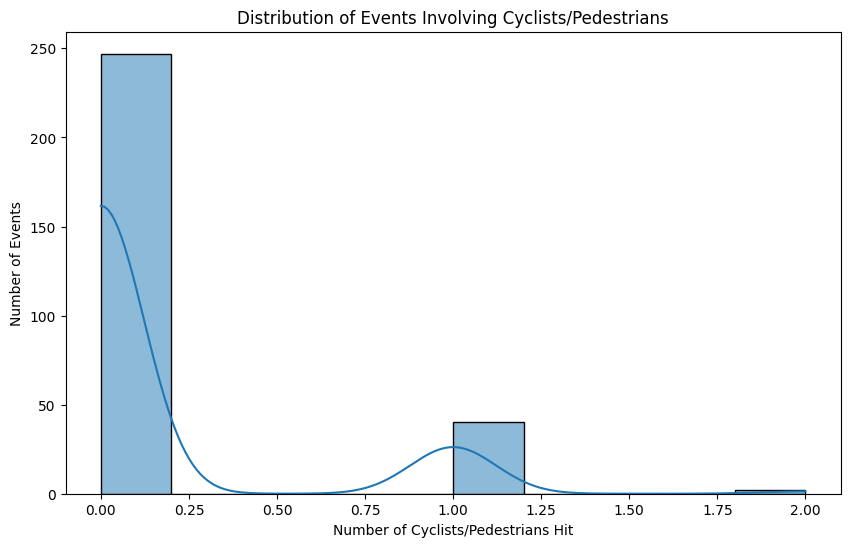

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cyclists/ Peds'], kde=True)
plt.title('Distribution of Events Involving Cyclists/Pedestrians')
plt.xlabel('Number of Cyclists/Pedestrians Hit')
plt.ylabel('Number of Events')
plt.show()

Number of accidents involving deaths of both Tesla occupants/drivers and cyclists/pedestrians: 176


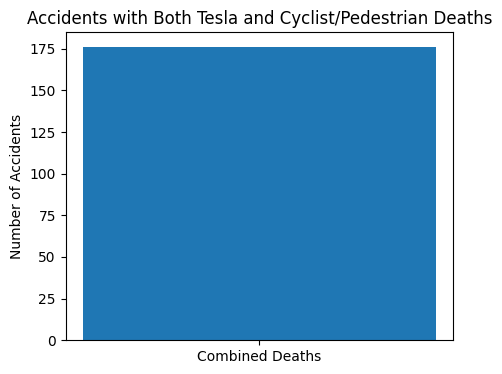

In [ ]:
# Filter for events with both Tesla occupant/driver deaths and cyclist/pedestrian deaths
filtered_df = df[(df['TSLA+cycl / peds'] > 0)]

# Count the number of such events
count = filtered_df.shape[0]

print(f"Number of accidents involving deaths of both Tesla occupants/drivers and cyclists/pedestrians: {count}")
# Filter for events with both Tesla occupant/driver deaths and cyclist/pedestrian deaths
filtered_df = df[(df['TSLA+cycl / peds'] > 0)]

# Count the number of such events
count = filtered_df.shape[0]

# Create a bar chart
plt.figure(figsize=(5, 4))  # Adjust size as needed
plt.bar(['Combined Deaths'], [count])
plt.ylabel('Number of Accidents')
plt.title('Accidents with Both Tesla and Cyclist/Pedestrian Deaths')
plt.show()

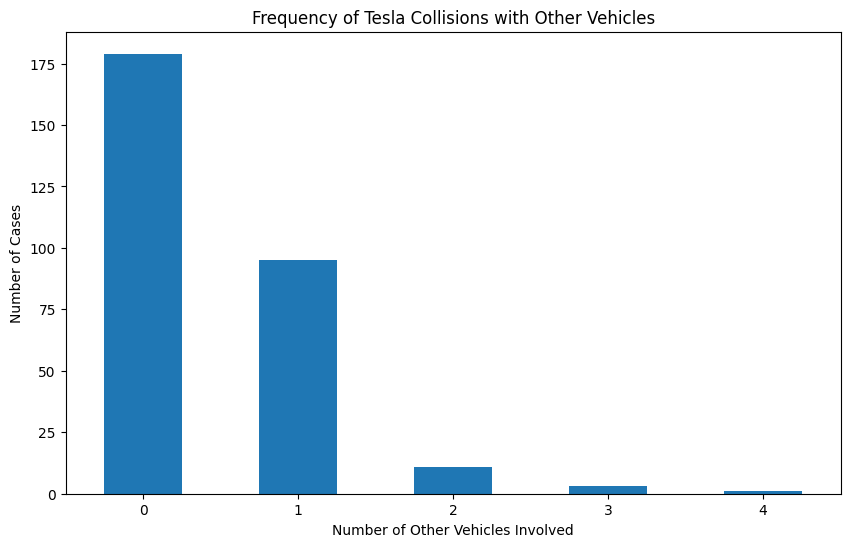

In [ ]:
# Count the occurrences of each collision frequency
collision_counts = df['Other vehicle'].value_counts()

plt.figure(figsize=(10, 6))
collision_counts.plot(kind='bar')
plt.xlabel('Number of Other Vehicles Involved')
plt.ylabel('Number of Cases')
plt.title('Frequency of Tesla Collisions with Other Vehicles')
plt.xticks(rotation=0)
plt.show()

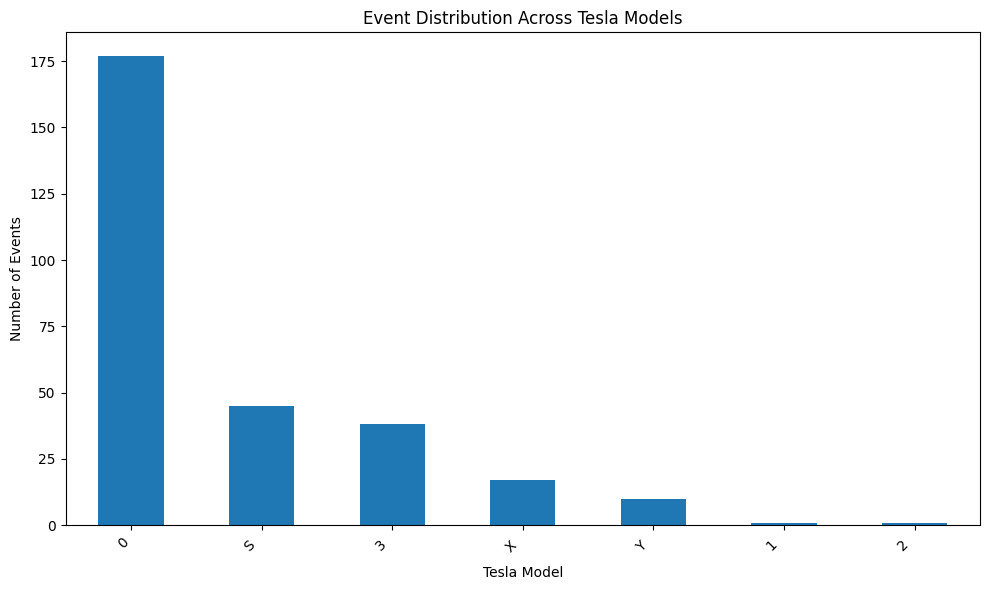

In [ ]:
# Count the occurrences of each model
model_counts = df['Model'].value_counts()

plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar')
plt.xlabel('Tesla Model')
plt.ylabel('Number of Events')
plt.title('Event Distribution Across Tesla Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

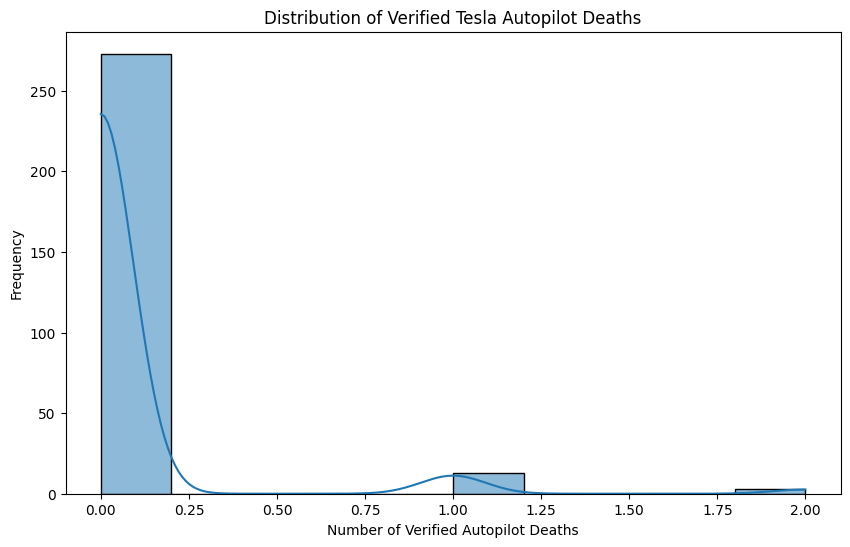

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Verified Tesla Autopilot Deaths'], kde=True, bins=10)  # Adjust bins as needed
plt.title('Distribution of Verified Tesla Autopilot Deaths')
plt.xlabel('Number of Verified Autopilot Deaths')
plt.ylabel('Frequency')
plt.show()

---
#Categorical Analysis

In [ ]:
# Group by year and count events
events_by_year = df.groupby('Date_Year')['Case #'].count()

# Group by state and year, then count events
events_by_state_year = df.groupby(['State', 'Date_Year'])['Case #'].count().unstack()

# Group by country and year, then count events
events_by_country_year = df.groupby(['Country', 'Date_Year'])['Case #'].count().unstack()

# Group by day of the week and count events
events_by_day = df.groupby('Date_Day')['Case #'].count()

<ipython-input-65-b9ed1a963bd7>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_by_state_year = df.groupby(['State', 'Date_Year'])['Case #'].count().unstack()
<ipython-input-65-b9ed1a963bd7>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  events_by_country_year = df.groupby(['Country', 'Date_Year'])['Case #'].count().unstack()


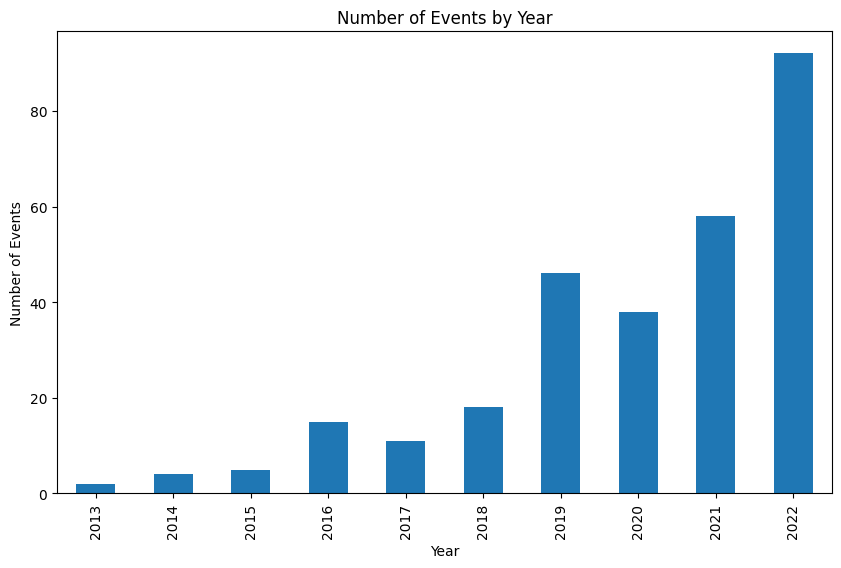

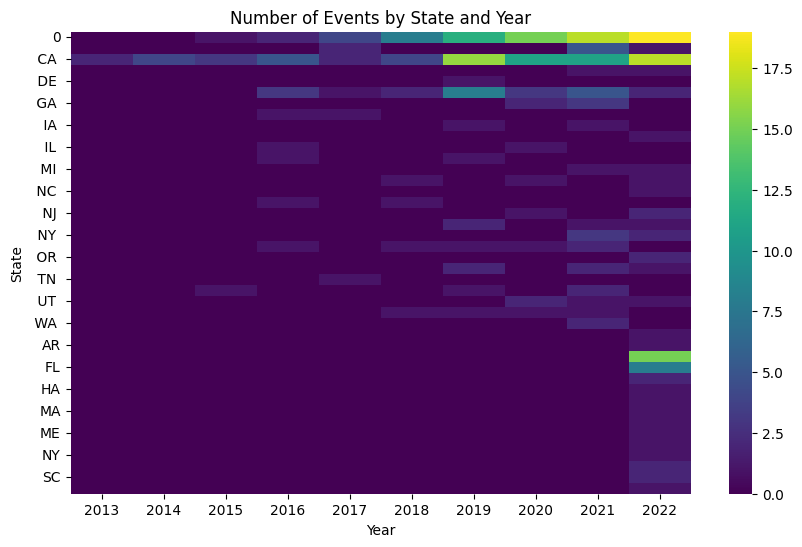

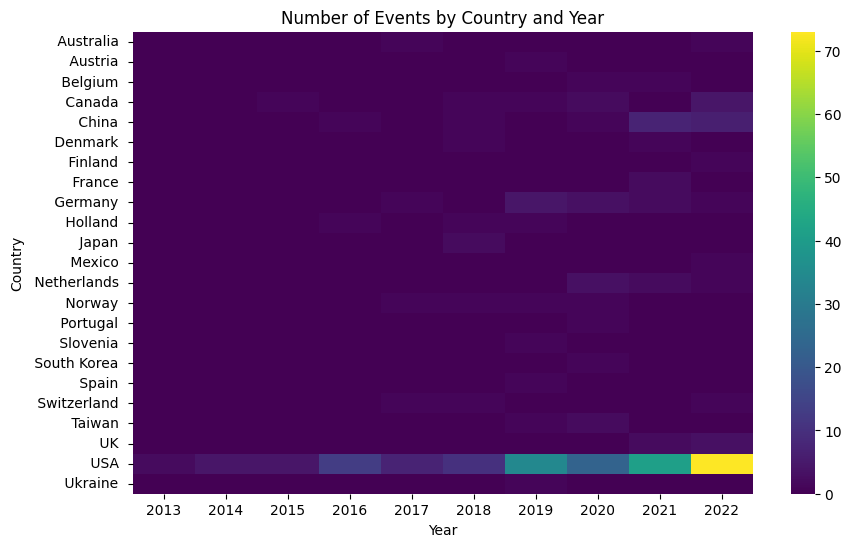

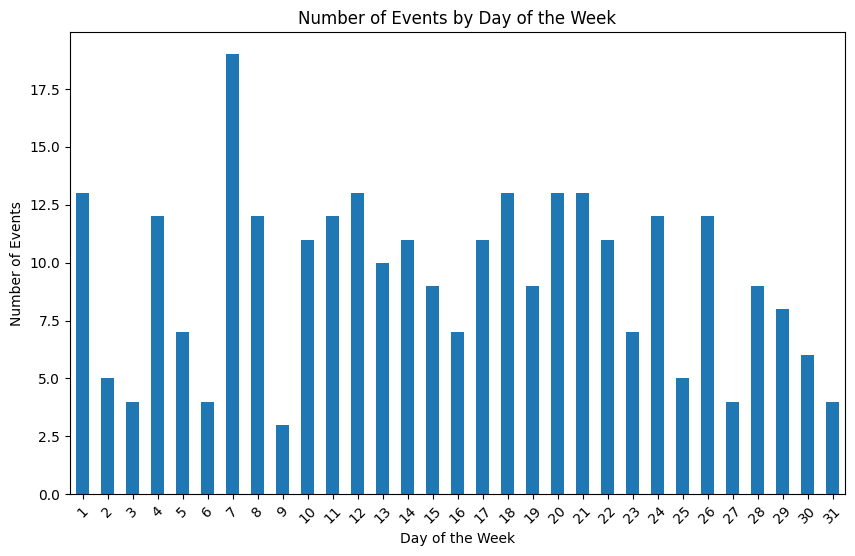

In [ ]:
# Plot events by year
plt.figure(figsize=(10, 6))
events_by_year.plot(kind='bar')
plt.title('Number of Events by Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()
print()

# Plot events by state and year (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(events_by_state_year, cmap='viridis')
plt.title('Number of Events by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()
print()

# Plot events by country and year (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(events_by_country_year, cmap='viridis')
plt.title('Number of Events by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()
print()

# Plot events by day of the week
plt.figure(figsize=(10, 6))
events_by_day.plot(kind='bar')
plt.title('Number of Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()